In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\HI\Downloads\titanic.csv")

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Handle missing values
df = pd.read_csv(r"C:\Users\HI\Downloads\titanic.csv")

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Drop columns that won't be used in the analysis
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Split the data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))




Accuracy: 82.12%
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



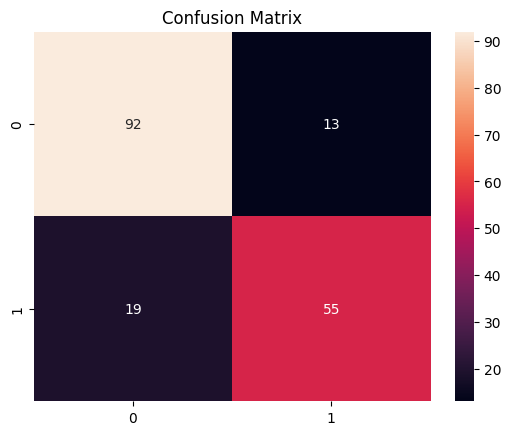

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()



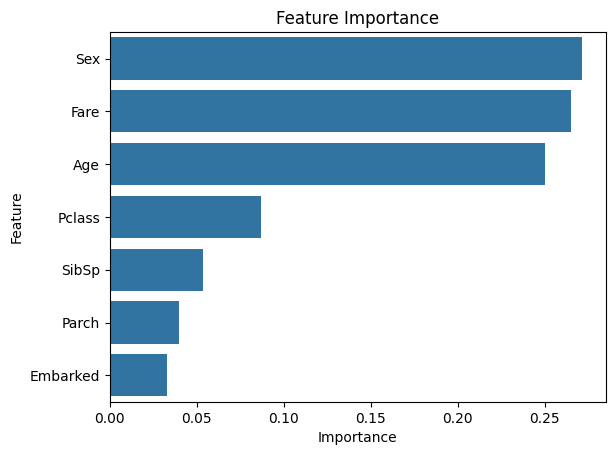

In [18]:
# Feature importance
importance = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

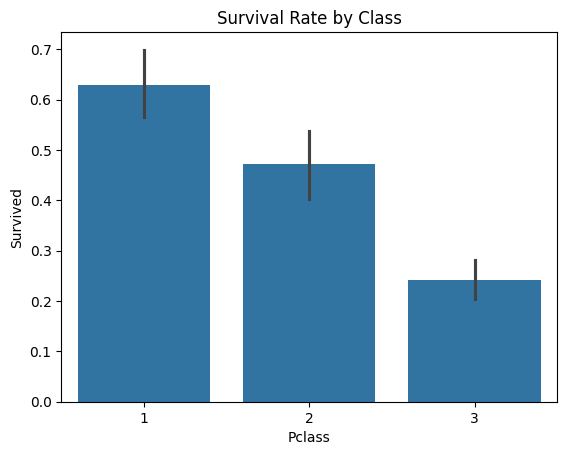

In [20]:
# Plot survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()



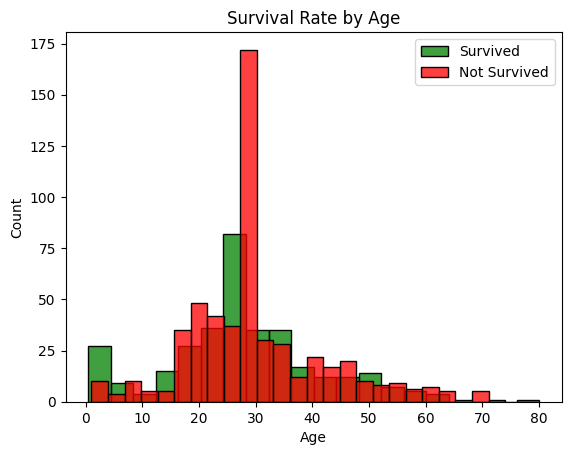

In [21]:
# Plot survival rate by age
sns.histplot(df[df['Survived'] == 1]['Age'], kde=False, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=False, color='red', label='Not Survived')
plt.legend()
plt.title('Survival Rate by Age')
plt.show()

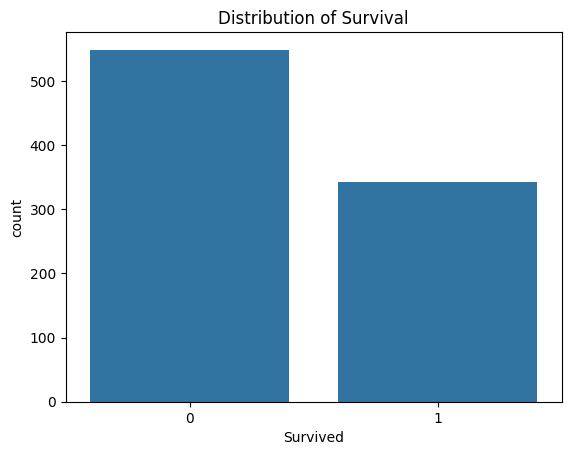

In [22]:
# Plot the distribution of survivors
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.show()



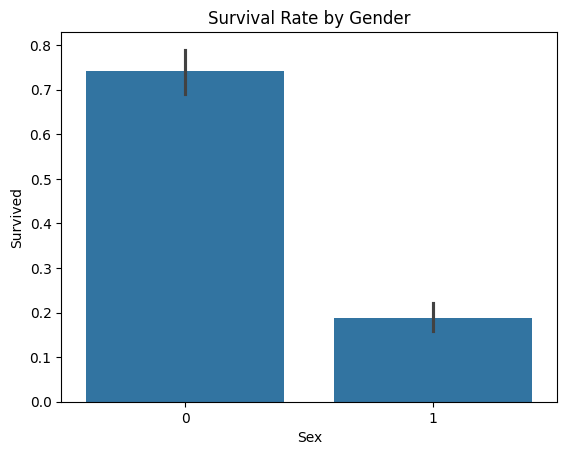

In [23]:
# Plot survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

In [26]:
df.describe().round(3)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000,891.000,891.000,891.000,891.000,891.000,891.000,891.000
mean,0.384,2.309,0.648,29.362,0.523,0.382,32.204,1.536
std,0.487,0.836,0.478,13.020,1.103,0.806,49.693,0.792
min,0.000,1.000,0.000,0.420,0.000,0.000,0.000,0.000
25%,0.000,2.000,0.000,22.000,0.000,0.000,7.910,1.000
50%,0.000,3.000,1.000,28.000,0.000,0.000,14.454,2.000
75%,1.000,3.000,1.000,35.000,1.000,0.000,31.000,2.000
max,1.000,3.000,1.000,80.000,8.000,6.000,512.329,2.000


In [32]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

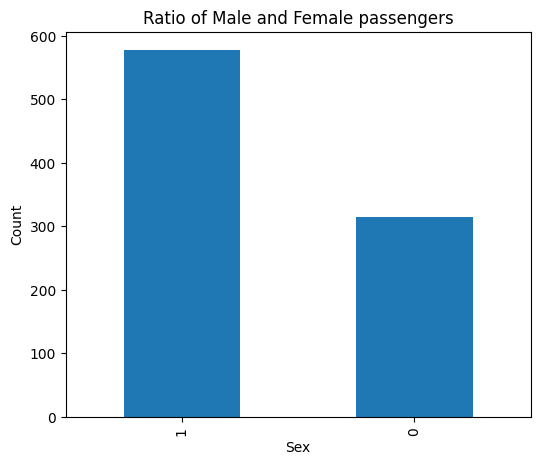

In [33]:
ax=df['Sex'].value_counts().plot(kind='bar',x = 'Survived',figsize=(6,5))   
plt.title("Ratio of Male and Female passengers")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.show()

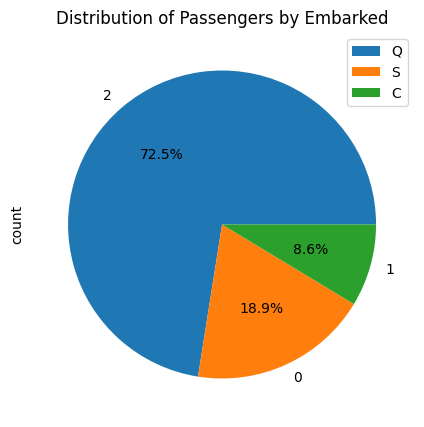

In [34]:
ax=df['Embarked'].value_counts().plot(kind='pie',figsize=(6,5),autopct='%1.1f%%')
plt.title("Distribution of Passengers by Embarked")
plt.legend(["Q", "S", "C"])
plt.show()

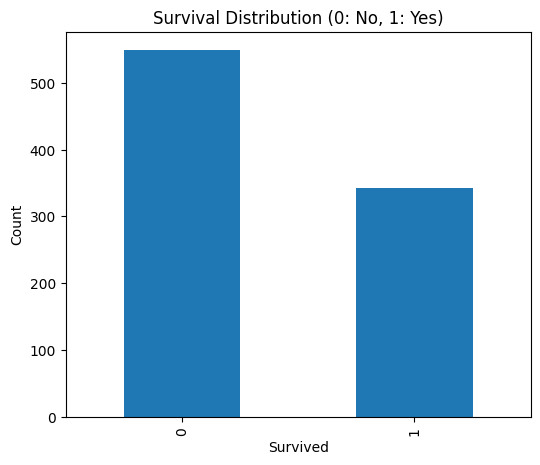

In [37]:
ax=df['Survived'].value_counts().plot(kind='bar',figsize=(6,5))    
plt.title("Survival Distribution (0: No, 1: Yes)")
plt.ylabel("Count")
plt.xlabel("Survived")
plt.show()

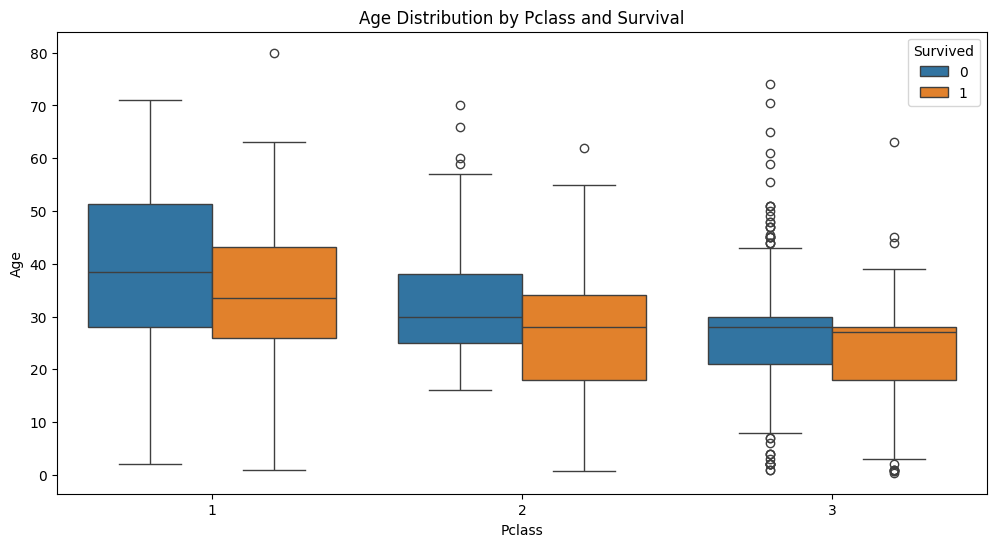

In [38]:
# Plot survival rate by socio-economic status and age
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Age Distribution by Pclass and Survival')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

<Figure size 1200x600 with 0 Axes>

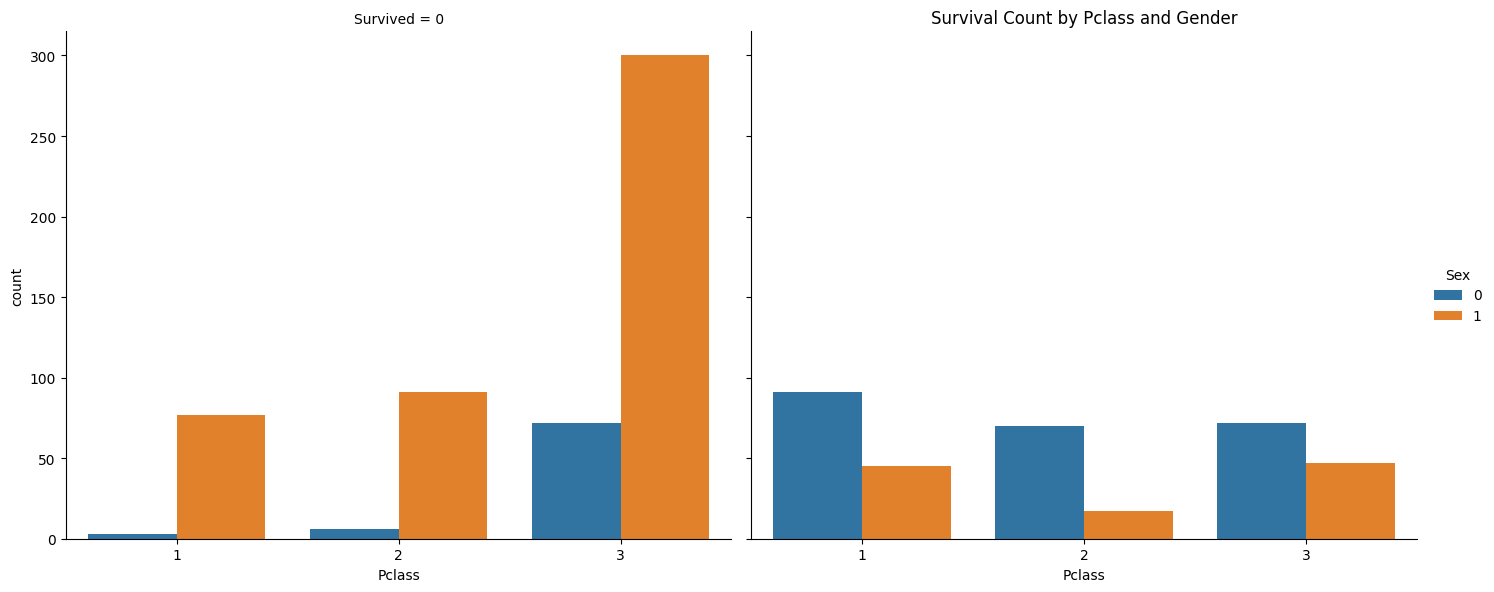

In [39]:
# Plot survival rate by socio-economic status and gender
plt.figure(figsize=(12, 6))
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=df, height=6, aspect=1.2)
plt.title('Survival Count by Pclass and Gender')
plt.show()

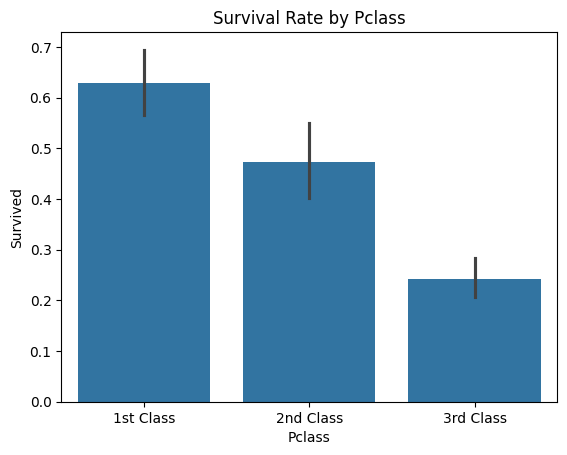

In [41]:
# Plot survival rate by class (socio-economic status)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()